# Security and Holdings Analysis

This notebook provides a comprehensive analysis of individual securities and holdings patterns in the 13F filings data, including security-level insights, holder concentration, and investment patterns.

## Table of Contents
1. [Security Overview](#security-overview)
2. [Top Securities Analysis](#top-securities)
3. [Holder Concentration](#holder-concentration)
4. [Security Type Deep Dive](#security-types)
5. [Investment Patterns](#investment-patterns)
6. [Voting Authority Analysis](#voting-authority)
7. [Cross-Period Analysis](#cross-period)
8. [Insights and Conclusions](#insights)


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load the processed data
print("Loading processed data...")

holdings = pd.read_parquet('../processed_data/combined_holdings.parquet')
managers = pd.read_parquet('../processed_data/manager_summary.parquet')
securities = pd.read_parquet('../processed_data/security_summary.parquet')

print(f"✅ Data loaded successfully!")
print(f"   Holdings: {len(holdings):,} records")
print(f"   Managers: {len(managers):,} records")
print(f"   Securities: {len(securities):,} records")


Loading processed data...
✅ Data loaded successfully!
   Holdings: 4,488,519 records
   Managers: 10,163 records
   Securities: 214,262 records


## 1. Security Overview {#security-overview}


In [3]:
# Security overview analysis
print("=" * 60)
print("SECURITY OVERVIEW")
print("=" * 60)

# Basic security statistics
total_securities = holdings['cusip'].nunique()
total_issuers = holdings['issuer_name'].nunique()
total_market_value = holdings['market_value'].sum()

print(f"\nSecurity Statistics:")
print(f"Total Unique Securities: {total_securities:,}")
print(f"Total Unique Issuers: {total_issuers:,}")
print(f"Total Market Value: ${total_market_value/1e12:.2f} trillion")

# Top securities by market value
print(f"\nTop 10 Securities by Market Value:")
top_securities = securities.nlargest(10, 'total_market_value')[['issuer_name', 'cusip', 'total_market_value', 'unique_managers']]
for i, (_, row) in enumerate(top_securities.iterrows(), 1):
    print(f"{i}. {row['issuer_name'][:50]}... - ${row['total_market_value']/1e9:.1f}B ({row['unique_managers']} holders)")

# Security type distribution
print(f"\nSecurity Type Distribution:")
security_type_dist = holdings['security_type'].value_counts()
for sec_type, count in security_type_dist.items():
    pct = (count / len(holdings)) * 100
    print(f"  {sec_type}: {count:,} holdings ({pct:.1f}%)")


SECURITY OVERVIEW

Security Statistics:
Total Unique Securities: 38,838
Total Unique Issuers: 124,130
Total Market Value: $86.99 trillion

Top 10 Securities by Market Value:
1. APPLE INC... - $2314.8B (4893 holders)
2. MICROSOFT CORP... - $2209.0B (5025 holders)
3. NVIDIA CORPORATION... - $1826.8B (4001 holders)
4. AMAZON COM INC... - $1292.2B (4283 holders)
5. META PLATFORMS INC... - $1022.5B (3806 holders)
6. NVIDIA CORPORATION... - $979.7B (800 holders)
7. SPDR S&P 500 ETF TR... - $931.2B (3325 holders)
8. MICROSOFT CORP... - $886.0B (975 holders)
9. ALPHABET INC... - $716.9B (3832 holders)
10. APPLE INC... - $686.1B (843 holders)

Security Type Distribution:
  COMMON_STOCK: 2,871,009 holdings (64.0%)
  OTHER: 1,226,098 holdings (27.3%)
  FUND: 298,321 holdings (6.6%)
  OPTION: 53,682 holdings (1.2%)
  DEBT: 37,243 holdings (0.8%)
  PREFERRED_STOCK: 1,725 holdings (0.0%)
  UNKNOWN: 441 holdings (0.0%)


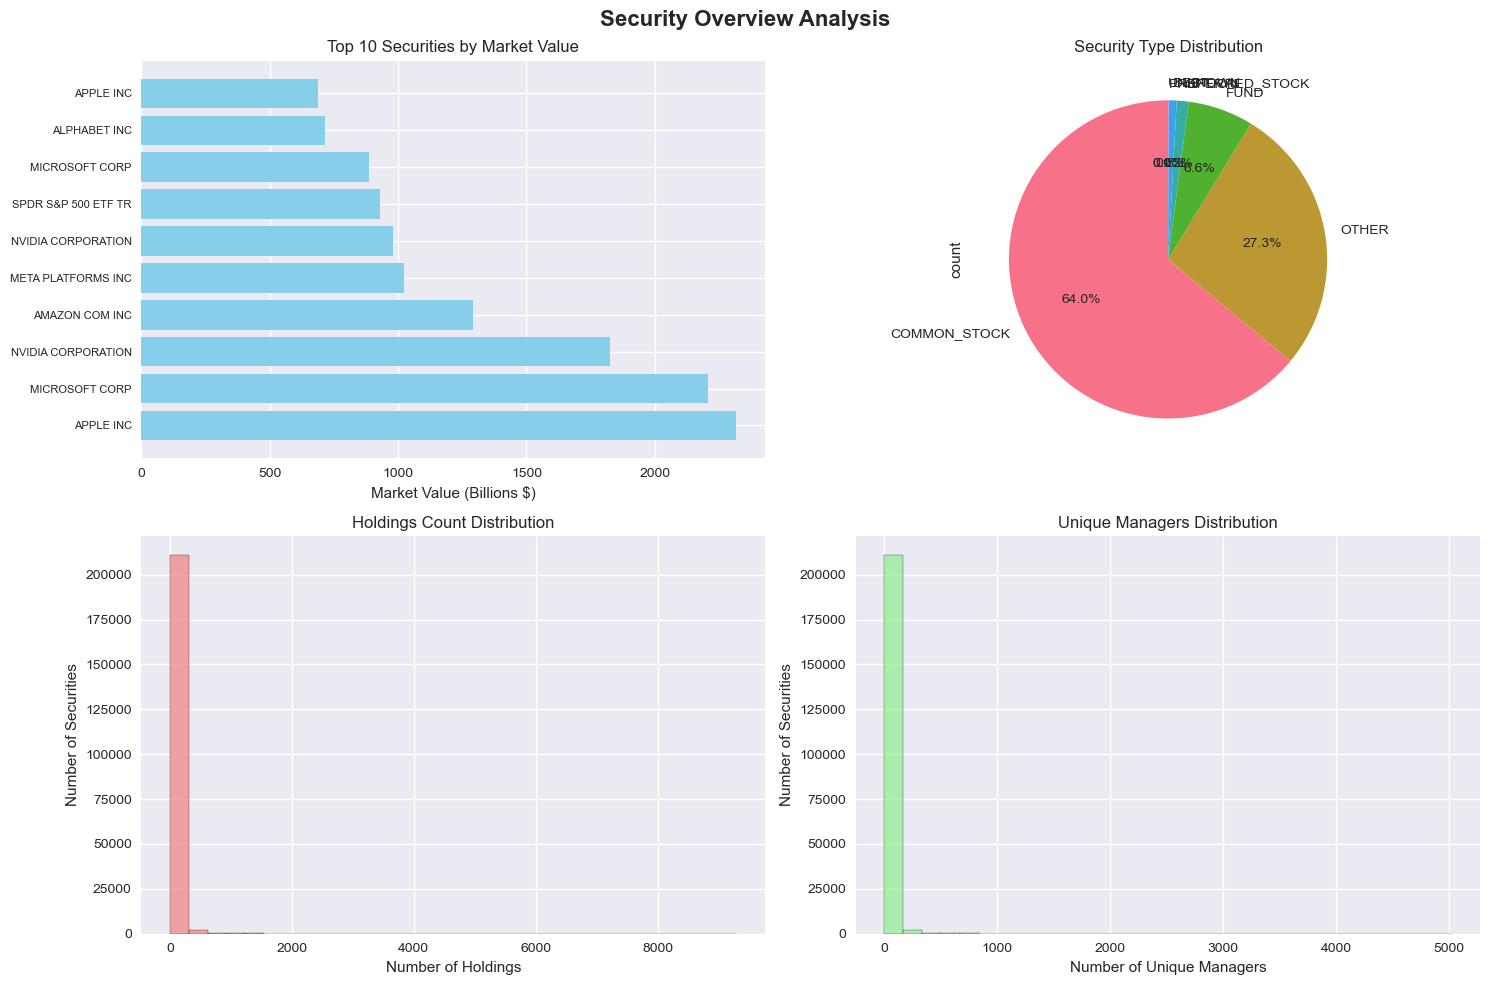

In [4]:
# Security overview visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Security Overview Analysis', fontsize=16, fontweight='bold')

# Top 10 securities by market value
top_10_securities = securities.nlargest(10, 'total_market_value')
axes[0,0].barh(range(len(top_10_securities)), top_10_securities['total_market_value']/1e9, color='skyblue')
axes[0,0].set_yticks(range(len(top_10_securities)))
axes[0,0].set_yticklabels([name[:30] + '...' if len(name) > 30 else name for name in top_10_securities['issuer_name']], fontsize=8)
axes[0,0].set_title('Top 10 Securities by Market Value')
axes[0,0].set_xlabel('Market Value (Billions $)')

# Security type distribution
security_type_dist.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Security Type Distribution')

# Holdings count distribution
axes[1,0].hist(securities['holding_count'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,0].set_title('Holdings Count Distribution')
axes[1,0].set_xlabel('Number of Holdings')
axes[1,0].set_ylabel('Number of Securities')

# Unique managers distribution
axes[1,1].hist(securities['unique_managers'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,1].set_title('Unique Managers Distribution')
axes[1,1].set_xlabel('Number of Unique Managers')
axes[1,1].set_ylabel('Number of Securities')

plt.tight_layout()
plt.show()
